<a href="https://colab.research.google.com/github/tada20001/NLP_2023/blob/main/CH09_08_%EC%82%AC%EC%A0%84%ED%9B%88%EB%A0%A8%EB%90%9C_%EC%9B%8C%EB%93%9C_%EC%9E%84%EB%B2%A0%EB%94%A9(Pre_trained_Word_Embedding).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

케라스 임베딩층과 사전훈련된 워드임베딩을 이용하여 비교

### 1. 케라스 임베딩층(Keras Embedding layer)
----------------
케라스는 훈련데이터의 단어들에 대해 워드 임베딩을 수행하는 도구 Embedding()을 제공함

Embedding()은 인공신경망 구조의 관점에서 임베딩층을 구현함

#### **임베딩층은 룩업 테이블임**

임베딩층의 입력으로 사용하기 위해 입력시퀀스의 각 단어들은 모두 정수 인코딩이 되어있어야 함

단어 --> 단어에 부여된 고유한 정수값 --> 임베딩층 통과 --> 밀집벡터

임베딩층은 입력정수에 대해 밀집벡터로 맵핑하고 이 밀집벡터는 인공신경망의 학습과정에서 가중치가 학습되는 것과 같은 방식으로 훈련함

훈련과정에서 단어는 모델이 풀고자 하는 작업에 맞는 값으로 업데이트됨. 그리고 이 밀집벡터를 임베딩 벡터라고 함

정수를 밀집벡터 또는 임베딩 벡터로 맵핑한다는 것은, 특정단어와 맵핑되는 정수를 인덱스로 가지는 테이블로부터 임베딩 벡터값을 가져오는 룩업 테이블이라고 할 수 있음

그리고 이 테이블은 단어집합의 크기만큼 행을 가지므로 모든 단어는 고유한 임베딩 벡터를 가짐

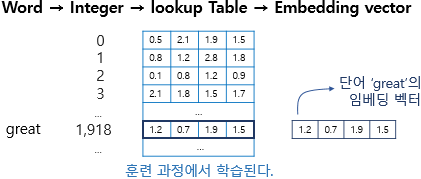

위의 그림과 같이 단어 'great'을 정수 인코딩한 후 테이블로부터 해당 인덱스에 위치한 임베딩 벡터를 꺼내옴

위의 그림에서는 임베딩 벡터 차원이 4로 설정되어 있고, 단어 great은 정수 인코딩 과정에서 1,918의 정수로 인코딩 되었고, 그에 따라 단어 집합의 크기만큼의 행을 가지는 테이블에서 인덱스 1,918번에 위치한 행을 단어 great의 임베딩 벡터로 사용함

이 임베딩 벡터는 모델의 입력이 되고, 역전파 과정에서 단어 great의 임베딩 벡터값이 학습됨

케라스는 단어를 정수 인덱스로 바꾸고 원-핫 벡터로 변환한 후 임베딩 층의 입력으로 사용하는 것이 아니라, 단어를 정수 인코딩까지만 진행한 후 임베딩 층의 입력으로 사용하여 룩업테이블 결과인 임베딩 벡터를 리턴함

In [1]:
vocab_size = 20000
output_dim = 128  # 임베딩 후 벡터 차원원
input_length = 500  # 입력시퀀스 길이. 샘플길이가 500


Embedding()은 (number of samples, input_length)인 2D 정수텐서를 입력으로 받음. Embedding()은 워드 임베딩 작업을 수행하고 (number of samples, input_length, embedding word dimentionality)인 3D 실수 텐서를 리턴함


#### **임베딩층 사용하기**
문장의 긍/부정을 판단하는 감성분류 모델 만들기

In [2]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
# 감성분류 입력데이터터
sentences = ['nice great best amazing', 'stop lies', 'pitiful nerd', 'excellent work', 'supreme quality', 'bad', 'highly respectable']
y_train = [1, 0, 0, 1, 1, 0, 1]

케라스의 토크나이저를 사용하여 단어집합을 만들고 그 크기를 확인함

In [4]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
vocab_size = len(tokenizer.word_index) + 1 # 패딩 고려 +1
vocab_size

16

In [5]:
## 각 문장에 대해 정수 인코딩 수행
x_encoded = tokenizer.texts_to_sequences(sentences)
print(x_encoded)

[[1, 2, 3, 4], [5, 6], [7, 8], [9, 10], [11, 12], [13], [14, 15]]


In [6]:
# 가장 긴 문장 길이 구함
max_len = max(len(sent) for sent in x_encoded)
max_len

4

In [7]:
# 최대 길이로 모든 샘플에 대한 패딩 실시
X_train = pad_sequences(x_encoded, maxlen=max_len, padding='post')
y_train = np.array(y_train)
print(X_train)

[[ 1  2  3  4]
 [ 5  6  0  0]
 [ 7  8  0  0]
 [ 9 10  0  0]
 [11 12  0  0]
 [13  0  0  0]
 [14 15  0  0]]


In [8]:
print(y_train)

[1 0 0 1 1 0 1]


In [9]:
# 이진분류 모델 설계.출력층에 1개의 뉴런을 배치하고 활성화함수로 시그모이드 함수, 손실함수로 binary_crossentropy 사용

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten

embedding_dim = 4  # 아웃풋 임베딩

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.fit(X_train, y_train, epochs=100, verbose=2)

Epoch 1/100
1/1 - 2s - loss: 0.6919 - acc: 0.5714 - 2s/epoch - 2s/step
Epoch 2/100
1/1 - 0s - loss: 0.6909 - acc: 0.5714 - 12ms/epoch - 12ms/step
Epoch 3/100
1/1 - 0s - loss: 0.6900 - acc: 0.5714 - 8ms/epoch - 8ms/step
Epoch 4/100
1/1 - 0s - loss: 0.6891 - acc: 0.5714 - 13ms/epoch - 13ms/step
Epoch 5/100
1/1 - 0s - loss: 0.6881 - acc: 0.5714 - 11ms/epoch - 11ms/step
Epoch 6/100
1/1 - 0s - loss: 0.6872 - acc: 0.5714 - 11ms/epoch - 11ms/step
Epoch 7/100
1/1 - 0s - loss: 0.6863 - acc: 0.5714 - 10ms/epoch - 10ms/step
Epoch 8/100
1/1 - 0s - loss: 0.6853 - acc: 0.5714 - 12ms/epoch - 12ms/step
Epoch 9/100
1/1 - 0s - loss: 0.6844 - acc: 0.5714 - 20ms/epoch - 20ms/step
Epoch 10/100
1/1 - 0s - loss: 0.6834 - acc: 0.5714 - 12ms/epoch - 12ms/step
Epoch 11/100
1/1 - 0s - loss: 0.6825 - acc: 0.7143 - 11ms/epoch - 11ms/step
Epoch 12/100
1/1 - 0s - loss: 0.6815 - acc: 0.7143 - 9ms/epoch - 9ms/step
Epoch 13/100
1/1 - 0s - loss: 0.6806 - acc: 0.7143 - 9ms/epoch - 9ms/step
Epoch 14/100
1/1 - 0s - loss: 0

### 2. 사전 훈련된 워드 임베딩(Pre-Trained Word Embedding) 사용하기
--------------------------
훈련 데이터가 적은 경우에는 해당 문제에 특화된 것은 아니지만, 많은 훈련데이터로 이미 Word2Vec이나 GloVe 등으로 학습되어져 있는 임베딩 벡터들을 사용하는 것이 성능의 개선을 가져올 수 있음


* GloVe 다운로드 링크 : http://nlp.stanford.edu/data/glove.6B.zip
* Word2Vec 다운로드 링크 : https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM

In [11]:
from urllib.request import urlretrieve, urlopen
import gzip
import zipfile

urlretrieve("http://nlp.stanford.edu/data/glove.6B.zip", filename="glove.6B.zip")
zf = zipfile.ZipFile('glove.6B.zip')
zf.extractall() 
zf.close()

In [12]:
# 임베딩 벡터 불러오기. 딕셔너리 구조로 가져와 벡터 개수 확인인
embedding_dict = dict()

f = open('glove.6B.100d.txt', encoding='utf8')
i=0
for line in f:
  word_vector = line.split()  # 단어별 임베딩벡터 데이터
  word = word_vector[0]

  #  array로 변환
  word_vector_arr = np.asarray(word_vector[1:], dtype='float32')
  embedding_dict[word] = word_vector_arr

f.close()

In [13]:
len(embedding_dict)  # 40만개 임베딩벡터 존재

400000

In [14]:
# 'repectable' 임베딩벡터 값 확인
embedding_dict['respectable']

array([-0.049773 ,  0.19903  ,  0.10585  ,  0.1391   , -0.32395  ,
        0.44053  ,  0.3947   , -0.22805  , -0.25793  ,  0.49768  ,
        0.15384  , -0.08831  ,  0.0782   , -0.8299   , -0.037788 ,
        0.16772  , -0.45197  , -0.17085  ,  0.74756  ,  0.98256  ,
        0.81872  ,  0.28507  ,  0.16178  , -0.48626  , -0.006265 ,
       -0.92469  , -0.30625  , -0.067318 , -0.046762 , -0.76291  ,
       -0.0025264, -0.018795 ,  0.12882  , -0.52457  ,  0.3586   ,
        0.43119  , -0.89477  , -0.057421 , -0.53724  ,  0.25587  ,
        0.55195  ,  0.44698  , -0.24252  ,  0.29946  ,  0.25776  ,
       -0.8717   ,  0.68426  , -0.05688  , -0.1848   , -0.59352  ,
       -0.11227  , -0.57692  , -0.013593 ,  0.18488  , -0.32507  ,
       -0.90171  ,  0.17672  ,  0.075601 ,  0.54896  , -0.21488  ,
       -0.54018  , -0.45882  , -0.79536  ,  0.26331  ,  0.18879  ,
       -0.16363  ,  0.3975   ,  0.1099   ,  0.1164   , -0.083499 ,
        0.50159  ,  0.35802  ,  0.25677  ,  0.088546 ,  0.4210

In [15]:
embedding_dict['respectable'].shape  # embedding_dim = 100

(100,)

In [16]:
embedding_matrix = np.zeros((vocab_size, 100))
print('임베딩 행렬의 크기(shape) :', np.shape(embedding_matrix))

임베딩 행렬의 크기(shape) : (16, 100)


In [17]:
# 기존 데이터의 각 단어와 맵핑된 정수값 확인
tokenizer.word_index.items()

dict_items([('nice', 1), ('great', 2), ('best', 3), ('amazing', 4), ('stop', 5), ('lies', 6), ('pitiful', 7), ('nerd', 8), ('excellent', 9), ('work', 10), ('supreme', 11), ('quality', 12), ('bad', 13), ('highly', 14), ('respectable', 15)])

'great'의 경우 정수 2로 맵핑됨. 사전 훈련된 벡터값으로는 다음과 같음

In [18]:
embedding_dict['great']

array([-0.013786 ,  0.38216  ,  0.53236  ,  0.15261  , -0.29694  ,
       -0.20558  , -0.41846  , -0.58437  , -0.77355  , -0.87866  ,
       -0.37858  , -0.18516  , -0.128    , -0.20584  , -0.22925  ,
       -0.42599  ,  0.3725   ,  0.26077  , -1.0702   ,  0.62916  ,
       -0.091469 ,  0.70348  , -0.4973   , -0.77691  ,  0.66045  ,
        0.09465  , -0.44893  ,  0.018917 ,  0.33146  , -0.35022  ,
       -0.35789  ,  0.030313 ,  0.22253  , -0.23236  , -0.19719  ,
       -0.0053125, -0.25848  ,  0.58081  , -0.10705  , -0.17845  ,
       -0.16206  ,  0.087086 ,  0.63029  , -0.76649  ,  0.51619  ,
        0.14073  ,  1.019    , -0.43136  ,  0.46138  , -0.43585  ,
       -0.47568  ,  0.19226  ,  0.36065  ,  0.78987  ,  0.088945 ,
       -2.7814   , -0.15366  ,  0.01015  ,  1.1798   ,  0.15168  ,
       -0.050112 ,  1.2626   , -0.77527  ,  0.36031  ,  0.95761  ,
       -0.11385  ,  0.28035  , -0.02591  ,  0.31246  , -0.15424  ,
        0.3778   , -0.13599  ,  0.2946   , -0.31579  ,  0.4294

단어집합의 모든 단어에 대해서 사전 훈련된 GloVe의 임베딩벡터들을 맵핑한 후 'great'의 벡터값이 의도한 인덱스의 위치에 삽입되었는지 확인

In [19]:
for word, index in tokenizer.word_index.items():
  vector_value = embedding_dict.get(word)
  if vector_value is not None:
    embedding_matrix[index] = vector_value

In [20]:
embedding_matrix[2]

array([-0.013786  ,  0.38216001,  0.53236002,  0.15261   , -0.29694   ,
       -0.20558   , -0.41846001, -0.58437002, -0.77354997, -0.87866002,
       -0.37858   , -0.18516   , -0.12800001, -0.20584001, -0.22925   ,
       -0.42598999,  0.3725    ,  0.26076999, -1.07019997,  0.62915999,
       -0.091469  ,  0.70348001, -0.4973    , -0.77691001,  0.66044998,
        0.09465   , -0.44893   ,  0.018917  ,  0.33146   , -0.35021999,
       -0.35789001,  0.030313  ,  0.22253001, -0.23236001, -0.19719   ,
       -0.0053125 , -0.25848001,  0.58081001, -0.10705   , -0.17845   ,
       -0.16205999,  0.087086  ,  0.63028997, -0.76648998,  0.51618999,
        0.14072999,  1.01900005, -0.43136001,  0.46138   , -0.43584999,
       -0.47567999,  0.19226   ,  0.36065   ,  0.78987002,  0.088945  ,
       -2.78139997, -0.15366   ,  0.01015   ,  1.17980003,  0.15167999,
       -0.050112  ,  1.26259995, -0.77526999,  0.36030999,  0.95761001,
       -0.11385   ,  0.28035   , -0.02591   ,  0.31246001, -0.15

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding

output_dim = 100

model = Sequential()
model.add(Embedding(vocab_size, output_dim, weights=[embedding_matrix], input_length=max_len, trainable=False))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.fit(X_train, y_train, epochs=100, verbose=2)

Epoch 1/100
1/1 - 1s - loss: 0.8485 - acc: 0.4286 - 557ms/epoch - 557ms/step
Epoch 2/100
1/1 - 0s - loss: 0.8240 - acc: 0.4286 - 8ms/epoch - 8ms/step
Epoch 3/100
1/1 - 0s - loss: 0.8002 - acc: 0.4286 - 8ms/epoch - 8ms/step
Epoch 4/100
1/1 - 0s - loss: 0.7772 - acc: 0.4286 - 7ms/epoch - 7ms/step
Epoch 5/100
1/1 - 0s - loss: 0.7550 - acc: 0.4286 - 7ms/epoch - 7ms/step
Epoch 6/100
1/1 - 0s - loss: 0.7336 - acc: 0.4286 - 8ms/epoch - 8ms/step
Epoch 7/100
1/1 - 0s - loss: 0.7130 - acc: 0.4286 - 8ms/epoch - 8ms/step
Epoch 8/100
1/1 - 0s - loss: 0.6932 - acc: 0.4286 - 8ms/epoch - 8ms/step
Epoch 9/100
1/1 - 0s - loss: 0.6742 - acc: 0.5714 - 9ms/epoch - 9ms/step
Epoch 10/100
1/1 - 0s - loss: 0.6560 - acc: 0.5714 - 9ms/epoch - 9ms/step
Epoch 11/100
1/1 - 0s - loss: 0.6384 - acc: 0.5714 - 9ms/epoch - 9ms/step
Epoch 12/100
1/1 - 0s - loss: 0.6216 - acc: 0.5714 - 9ms/epoch - 9ms/step
Epoch 13/100
1/1 - 0s - loss: 0.6054 - acc: 0.5714 - 10ms/epoch - 10ms/step
Epoch 14/100
1/1 - 0s - loss: 0.5899 - ac

#### **사전 훈련된 Word2Vec 사용하기**

In [22]:
import gensim

In [26]:
!ls

glove.6B.100d.txt  glove.6B.300d.txt  glove.6B.zip
glove.6B.200d.txt  glove.6B.50d.txt   sample_data


In [30]:
urlretrieve("https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?resourcekey=0-wjGZdNAUop6WykTtMip30g", filename="GoogleNews-vectors-negative300.bin.gz")


('GoogleNews-vectors-negative300.bin.gz',
 <http.client.HTTPMessage at 0x7f3446fbec70>)

In [31]:
word2vec_model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)

BadGzipFile: ignored